In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
len(x_train)

60000

這是 Bag


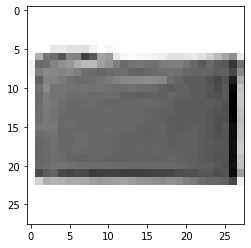

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

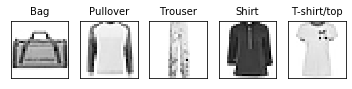

In [5]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys') 

In [6]:
y_train[n]

0

In [7]:
x_train=x_train/255
x_test=x_test/255
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_train,10)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [10]:
model=Sequential()

In [11]:
model.add(Dense(99,input_dim=784,activation='relu'))
model.add(Dense(99,activation='relu'))
model.add(Dense(99,activation='relu'))

In [12]:
model.add(Dense(10,activation='softmax'))

NameError: name 'x_train' is not defined

In [13]:
model.compile(loss='mse',optimizer=SGD(lr=0.08877),metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 99)                77715     
_________________________________________________________________
dense_1 (Dense)              (None, 99)                9900      
_________________________________________________________________
dense_2 (Dense)              (None, 99)                9900      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1000      
Total params: 98,515
Trainable params: 98,515
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train,y_train,batch_size=87,epochs=23)

Train on 60000 samples
Epoch 1/23
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0737 - accuracy: 0.4461
Epoch 2/23
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0438 - accuracy: 0.6988
Epoch 3/23
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0346 - accuracy: 0.7680
Epoch 4/23
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0304 - accuracy: 0.7981
Epoch 5/23
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0279 - accuracy: 0.8121
Epoch 6/23
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0263 - accuracy: 0.8220
Epoch 7/23
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0252 - accuracy: 0.8288
Epoch 8/23
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0245 - accuracy: 0.8346s -
Epoch 9/23
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0238 - accuracy: 0.8383
Epoch 10/23

In [16]:
model.fit(x_train,y_train,batch_size=87,epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0195 - accuracy: 0.8694
Epoch 2/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0193 - accuracy: 0.8712
Epoch 3/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0191 - accuracy: 0.8719
Epoch 4/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0190 - accuracy: 0.8722
Epoch 5/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0188 - accuracy: 0.8740
Epoch 6/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0187 - accuracy: 0.8748
Epoch 7/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0185 - accuracy: 0.8759
Epoch 8/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0184 - accuracy: 0.8771
Epoch 9/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0183 - accuracy: 0.8783
Epoch 10/20
60

In [17]:
result=model.predict_classes(x_test)

In [19]:
def show_predict(p):
    print('神經網路說是:',class_names[result[p]])
    plt.imshow(x_test[p].reshape(28,28),cmap='Greys')

神經網路說是: Sandal


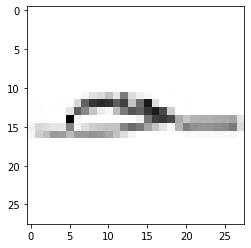

In [20]:
show_predict(8)

神經網路說是: Dress


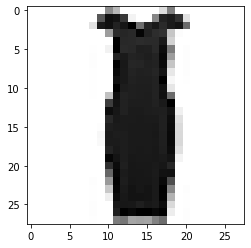

In [21]:
show_predict(666)

神經網路說是: Shirt


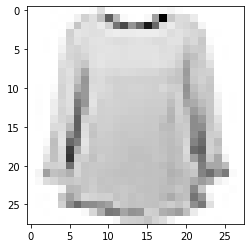

In [23]:
show_predict(8787)

神經網路說是: Sneaker


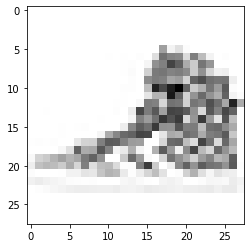

In [24]:
show_predict(6666)print(x_train.shape)
print(y_train.shape)print(x_train.shape)
print(y_train.shape)

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


### 更改的部分:
* 將神經元的個數變成99個
* 將隱藏層變成三層
* model.compile的lr設成0.08877
* model.fit的batch_size與epoch皆有調整，並做了兩次訓練